# Accessing CSV data

Data downloaded from:
    
* https://w3.unece.org/PXWeb2015/pxweb/en/STAT/STAT__40-TRTRANS__05-TRRAIL/01_en_TRrailpassengers_r.px/

Find more stats on:

* https://w3.unece.org/PXWeb/en

> United Nations Economic Commission for Europe -- support.stat@un.org

In [1]:
%load_ext watermark

In [2]:
%watermark

2019-10-03T21:11:09+02:00

CPython 3.7.4
IPython 7.8.0

compiler   : GCC 7.4.0
system     : Linux
release    : 5.0.0-29-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [3]:
import pandas as pd
import matplotlib
%matplotlib inline

In [4]:
df = pd.read_csv("data/c0001075.csv", sep="\t", skiprows=2)

In [5]:
topics = {
    'n': 'Number of passengers (1000s)',
    'p': 'Passenger kilometres (millions)',
}
kinds = {
    't': 'Total',
    'n': 'National transport',
    'i': 'International transport',
}

In [6]:
def by_country(df, name):
    return df[df.Country == name]

def by_passengers(df, kind='t'):
    return df[df.Passengers == kinds[kind]]

def by_topic(df, topic='n'):
    return df[df.Topic == topics[topic]]

In [7]:
data = by_country(by_passengers(by_topic(df, 'n'), 't'), 'Romania')

In [8]:
data.loc[:, "1970":]

,1970,1975,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
34,..,..,..,..,..,..,..,..,..,..,...,70332,64272,61000,57562,57433,64760,66482,64456,69057,..


In [9]:
def passenger_numbers(df, kind='i', topic='n'):
    countries = ('Serbia', 'Croatia', 'Slovenia', 'Bosnia and Herzegovina', 'North Macedonia', 'Montenegro', 'Romania')
    data = df[
        (df.Country.isin(countries)) &
        (df.Passengers == kinds[kind]) &
        (df.Topic == topics[topic])
    ].transpose()[2:]
    data.columns = data.iloc[0]
    data = data.replace('..', 0)
    data.set_index(data.iloc[:, 0].values)
    return data[1:].astype(int)

In [10]:
data = passenger_numbers(df)

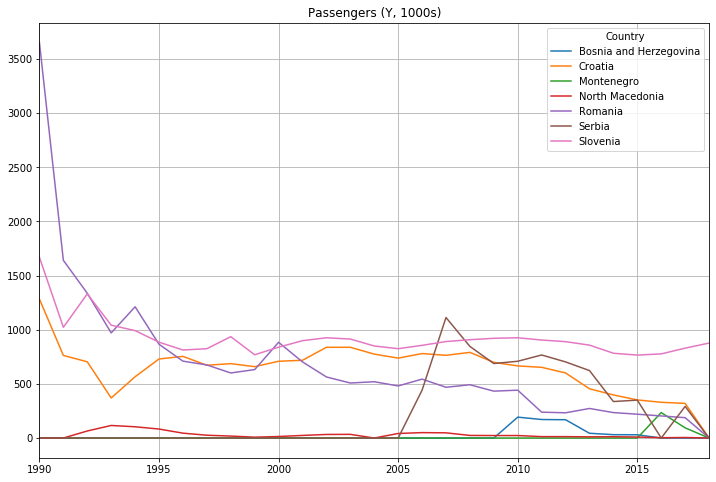

In [11]:
data.loc["1990":].plot(figsize=(12, 8), grid=True, title='Passengers (Y, 1000s)');